In [1]:
from itertools import combinations
from scipy.stats import ttest_ind
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50)  # показывать больше колонок

# Цели и задачи

## Цель: 
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
## Задачи: 
1. Провести первичную обработку данных.
2. Посмотреть на распределение признака для числовых переменных, устранить выбросы.
3. Оценить количество уникальных значений для номинативных переменных.
4. Провести корреляционный анализ количественных переменных.
5. Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину.
6. Сформулировать выводы относительно качества данных и тех переменных, которые будут использоваться в дальнейшем построении модели.

# Первичный осмотр данных

In [2]:
students = pd.read_csv('stud_math.xls')

In [3]:
print(
    f'Набор данных содержит {students.shape[0]} строк и {students.shape[1]} столбцов.')

Набор данных содержит 395 строк и 30 столбцов.


В описании указано, что набор данных содержит **29** столбцов. Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [4]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj


Видно, что в датасете есть пропуски, посмотрим по каждому столбцу процент пропущенных данных:

In [5]:
for col in students.columns:
    missing = np.mean(students[col].isnull())
    print('{} - {:.0f}%'.format(col, missing*100))

school - 0%
sex - 0%
age - 0%
address - 4%
famsize - 7%
Pstatus - 11%
Medu - 1%
Fedu - 6%
Mjob - 5%
Fjob - 9%
reason - 4%
guardian - 8%
traveltime - 7%
studytime - 2%
failures - 6%
schoolsup - 2%
famsup - 10%
paid - 10%
activities - 4%
nursery - 4%
studytime, granular - 2%
higher - 5%
internet - 9%
romantic - 8%
famrel - 7%
freetime - 3%
goout - 2%
health - 4%
absences - 3%
score - 2%


**Итого:** в данном наборе данных присутствует столбец не указанный в задании **"studytime, granular"**, все значения являются отрицательными, количество значений совпадает с колонкой **"studytime"**. В наборе данных множество номинативных признаков, причем некоторые отображаются в текстовой форме, а некоторые в числовой. Также все числа в наборе данных являются целыми. Есть 2% пропусков в целевом параметре. 

# Первичный анализ данных в столбцах

## school
Указана аббревиатура школы, в которой учится ученик. Номинативный признак.

GP    0.883544
MS    0.116456
Name: school, dtype: float64


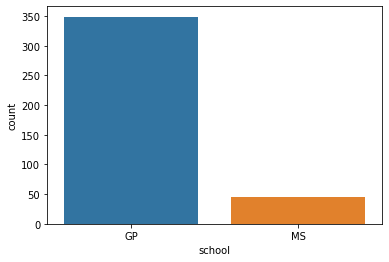

In [6]:
print(students['school'].value_counts(normalize=True, dropna=False))
sns.countplot(data=students, x='school');

**Итого:** в столбце **2** уникальных значения (GP, MS). 88,4% учеников учится в школе GP, в MS - 11,6%. Пустые данные отсутствуют. 

## sex
Пол ученика ('F' - женский, 'M' - мужской). Номинативный признак.

F    0.526582
M    0.473418
Name: sex, dtype: float64

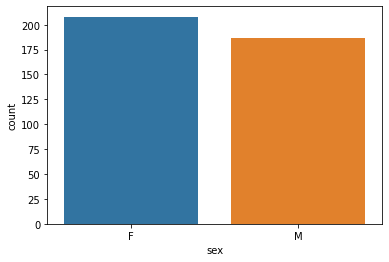

In [7]:
display(students['sex'].value_counts(normalize=True, dropna=False))
sns.countplot(data=students, x='sex');

Ученики женского пола составляют 52,7%, а мужского - 47,3%. Посмотрим как распределены ученики по школам:

school  sex
GP      F      0.524355
        M      0.475645
MS      F      0.543478
        M      0.456522
Name: sex, dtype: float64

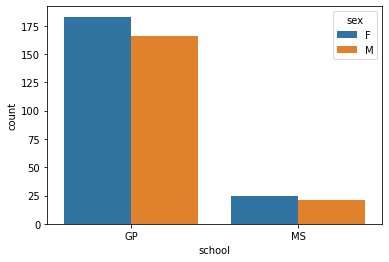

In [8]:
display(students.groupby(by='school')['sex'].value_counts(normalize=True))
sns.countplot(data=students, x='school', hue='sex');

**Итого:** В столбце **2** уникальных значения (M, F), пустые данные отсутствуют. В школе 'GP' ученики женского пола составляют 52,4%, а мужского - 47,6%. В школе 'MS' ученики женского пола составляют 54,3%, а мужского - 45,7%. 

## age
Возраст ученика (от 15 до 22). Количественный признак.

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

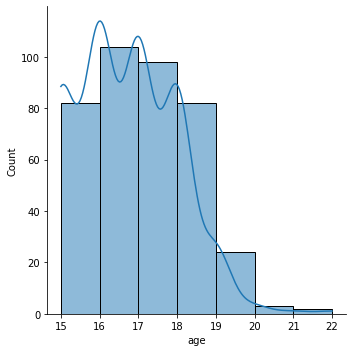

In [9]:
display(students['age'].value_counts(dropna=False))
sns.displot(data=students, x='age', bins=7, kde=True);

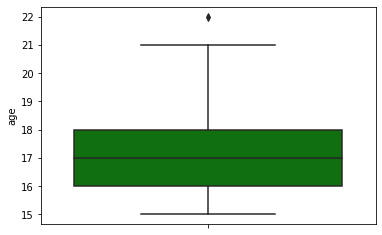

In [10]:
sns.boxplot(data=students, y='age', color='green');

**Итого:** у этого признака распределение без аномалий, пустых данных нет. Несмотря на то, что boxplot показывает возраст равный 22 годам как выброс. Он таковым не является, так как по условию дана возрастная группа от 15 до 22 лет включительно.

## address 
Тип адреса ученика ('U' - городской, 'R' - за городом). Номинативный признак.

U      295
R       83
NaN     17
Name: address, dtype: int64

<AxesSubplot:xlabel='address', ylabel='count'>

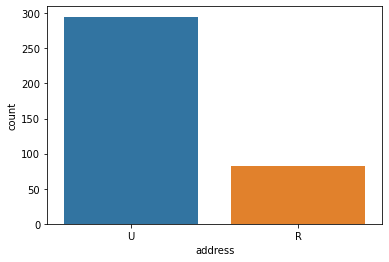

In [11]:
display(students['address'].value_counts(dropna=False))
sns.countplot(data=students, x='address')

**Итого:** в столбце **2** уникальных значения (U, R), пропущено **17** значений. Заполнить пропуски на данный момент не представляется возможным. Видно, что в городе проживает большенство учеников.

## famsize
Размер семьи ('LE3' <= 3, 'GT3' >3). Номинативный признак.

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

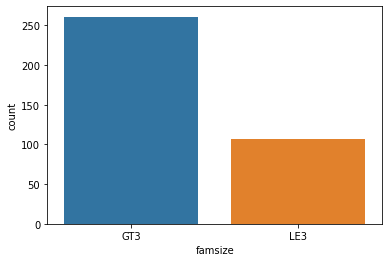

In [12]:
display(students['famsize'].value_counts(dropna=False))
sns.countplot(data=students, x='famsize');

**Итого:** в столбце **2** уникальных значения (LE3, GT3). Количество пустых значений составляет **27**. Заполнить пропуски на данный момент не представляется возможным. Видно, что подавляющее количество семей состоит из более, чем 3 человек. 

## Pstatus
Cтатус совместного жилья родителей ('T' - живут вместе 'A' - раздельно). Номинативный признак.

T      314
NaN     45
A       36
Name: Pstatus, dtype: int64

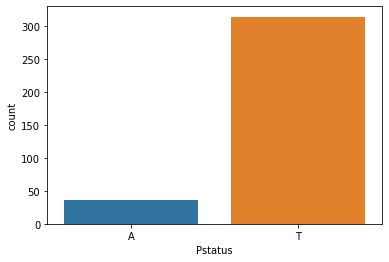

In [13]:
display(students['Pstatus'].value_counts(dropna=False))
sns.countplot(data=students, x='Pstatus');

**Итого:** в столбце **2** уникальных значения (A, T). Пропущено **45** значений. Заполнить пропуски на данный момент не представляется возможным.

## Medu
Образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Номинативный признак.

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64

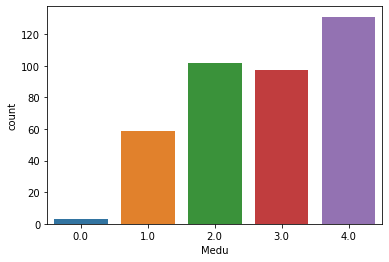

In [14]:
display(students['Medu'].value_counts(dropna=False))
sns.countplot(x='Medu', data=students);

**Итого:** в столбце **5** уникальных значений (0, 1, 2, 3, 4). Пропущено **3** значения. В данном случае можно использовать в качестве заполнителя наиболее часто встречающееся значение.

In [15]:
sub = students['Medu'].describe()['max']
students['Medu'] = students['Medu'].fillna(sub)

## Fedu
Образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Номинативный признак.

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

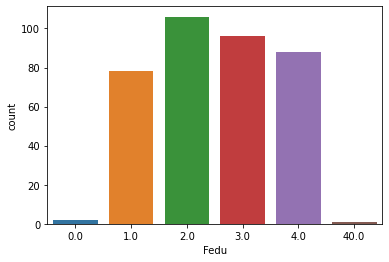

In [16]:
display(students['Fedu'].value_counts(dropna=False))
sns.countplot(x='Fedu', data=students);

**Итого:** в столбце **5** уникальных значений (0, 1, 2, 3, 4). Пропущено **24** значения. Заполнить пропуски на данный момент не представляется возможным. Здесь явно прослеживается выброс равный **40**. По скольку в данном столбце всего 5 категорий, то вероятно выброс получился в результате опечатки и реальное значение относится к категории **4**.

In [17]:
index = students[students['Fedu'] > 5].index
students.loc[index, ['Fedu']] = 4.0

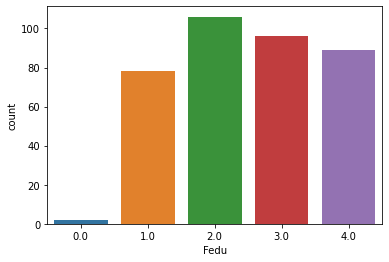

In [18]:
sns.countplot(x='Fedu', data=students);

## Mjob
Работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). Номинативный признак.

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

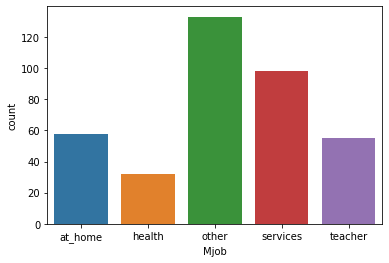

In [19]:
display(students['Mjob'].value_counts(dropna=False))
sns.countplot(data=students, x='Mjob');

**Итого:** в столбце **5** уникальных значений (at_home, health, services, teacher, other). Пропущено **19** значений. Заполнить пропуски на данный момент не представляется возможным. 

## Fjob
Работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). Номинативный признак.

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

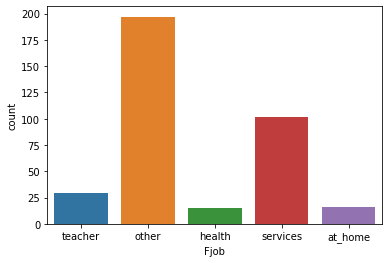

In [20]:
display(students['Fjob'].value_counts(dropna=False))
sns.countplot(data=students, x='Fjob');

**Итого:** в столбце **5** уникальных значений (at_home, health, services, teacher, other). Пропущено **36** значений. Заполнить пропуски на данный момент не представляется возможным.

## reason
Причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое). Номинативный признак.

course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64

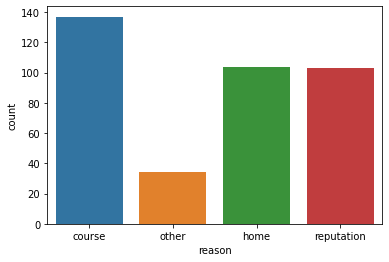

In [21]:
display(students['reason'].value_counts(dropna=False))
sns.countplot(data=students, x='reason');

**Итого:** в столбце **4** уникальных значения (course, home, reputation, other). Пропущено **17** значений. Заполнить пропуски на данный момент не представляется возможным.

## guardian
Опекун ('mother' - мать, 'father' - отец, 'other' - другое). Номинативный признак.

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

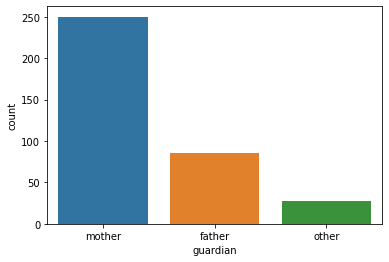

In [22]:
display(students['guardian'].value_counts(dropna=False))
sns.countplot(data=students, x='guardian');

**Итого:** в столбце **3** уникальных значения (father, mother, other). Пропущено **31** значение. Заполнить пропуски на данный момент не представляется возможным.

## traveltime 
Время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.). Номинативный признак.

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

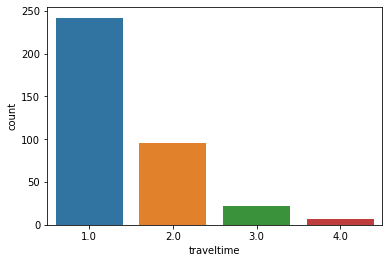

In [23]:
display(students['traveltime'].value_counts(dropna=False))
sns.countplot(data=students, x='traveltime');

**Итого:** в столбце **4** уникальных значений (1, 2, 3, 4). Пропущено **28** значений. Заполнить пропуски на данный момент не представляется возможным. Подавляющее большенство учеников живет вблизи мест учебы. 

## studytime 
Время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов). Номинативный признак.

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

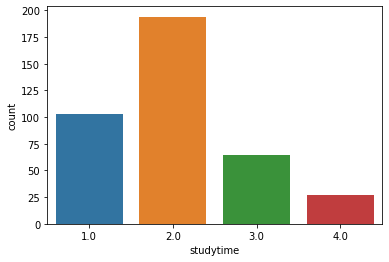

In [24]:
display(students['studytime'].value_counts(dropna=False))
sns.countplot(data=students, x='studytime');

**Итого:** в столбце **4** уникальных значений (1, 2, 3, 4). Пропущено **7** значений. Заполнить пропуски на данный момент не представляется возможным.

## failures
Количество внеучебных неудач (n, если 1<=n<=3, иначе 0). Номинативный признак.

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

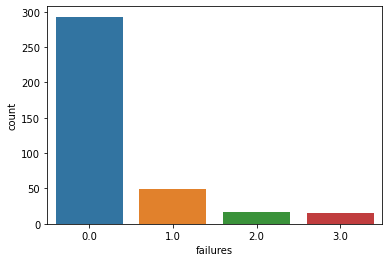

In [25]:
display(students['failures'].value_counts(dropna=False))
sns.countplot(data=students, x='failures');

**Итого:** в столбце **4** уникальных значений (0, 1, 2, 3). Пропущено **22** значения. Заполнить пропуски на данный момент не представляется возможным.

## schoolsup
Дополнительная образовательная поддержка (yes или no). Номинативный признак.

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

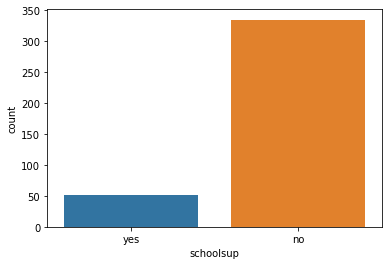

In [26]:
display(students['schoolsup'].value_counts(dropna=False))
sns.countplot(data=students, x='schoolsup');

In [27]:
students.groupby('schoolsup')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
schoolsup,,,,,,,,
no,331.0,53.126888,23.953153,0.0,45.0,55.0,70.0,100.0
yes,49.0,47.040816,14.610155,0.0,40.0,50.0,55.0,85.0


**Итого:** в столбце **2** уникальных значений (yes, no). Пропущено **9** значений. В данном случае можно использовать в качестве заполнителя наиболее часто встречающееся значение. Дополнительная образовательная поддержка практически не влияет на итоговые баллы по математике. 

In [28]:
sub = students['schoolsup'].describe()['top']
students['schoolsup'] = students['schoolsup'].fillna(sub)

## famsup
Семейная образовательная поддержка (yes или no). Номинативный признак.

yes    219
no     137
NaN     39
Name: famsup, dtype: int64

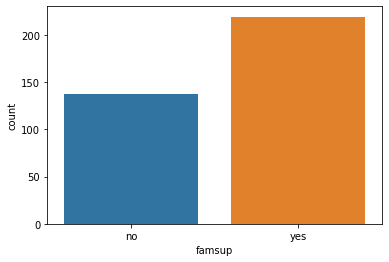

In [29]:
display(students['famsup'].value_counts(dropna=False))
sns.countplot(data=students, x='famsup');

In [30]:
students.groupby('famsup')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
famsup,,,,,,,,
no,135.0,52.074074,23.997708,0.0,42.5,55.0,67.5,100.0
yes,216.0,51.712963,22.962680,0.0,40.0,55.0,70.0,95.0


**Итого:** в столбце **2** уникальных значений (yes, no). Пропущено **39** значений. Заполнить пропуски в данный момент не представляется возможным. Семейная образовательная поддержка практически не влияет на итоговые баллы по математике.

## paid
Дополнительные платные занятия по математике (yes или no). Номинативный признак.

no     200
yes    155
NaN     40
Name: paid, dtype: int64

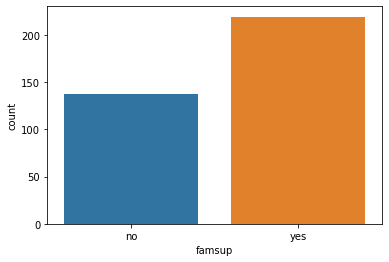

In [31]:
display(students['paid'].value_counts(dropna=False))
sns.countplot(data=students, x='famsup');

In [32]:
students.groupby('paid')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
paid,,,,,,,,
no,197.0,50.35533,25.522612,0.0,40.0,55.0,70.0,100.0
yes,153.0,55.00000,19.313889,0.0,45.0,55.0,70.0,95.0


**Итого:** в столбце **2** уникальных значений (yes, no). Пропущено **40** значений. Заполнить пропуски в данный момент не представляется возможным.

## activities
Дополнительные внеучебные занятия (yes или no). Номинативный признак.

yes    195
no     186
NaN     14
Name: activities, dtype: int64

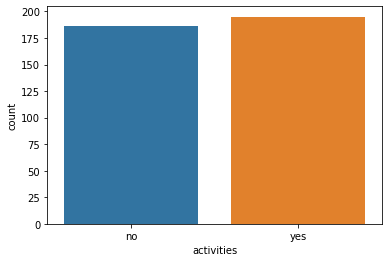

In [33]:
display(students['activities'].value_counts(dropna=False))
sns.countplot(data=students, x='activities');

In [34]:
students.groupby('activities')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
activities,,,,,,,,
no,183.0,52.185792,22.357692,0.0,40.0,55.0,65.0,95.0
yes,192.0,52.682292,23.568283,0.0,45.0,55.0,70.0,100.0


**Итого:** в столбце **2** уникальных значений (yes, no). Пропущено **14** значений. Заполнить пропуски в данный момент не представляется возможным. Дополнительные внеучебные занятия практически не влияют на итоговые баллы по математике.

## nursery
Посещал детский сад (yes или no). Номинативный признак.

yes    300
no      79
NaN     16
Name: nursery, dtype: int64

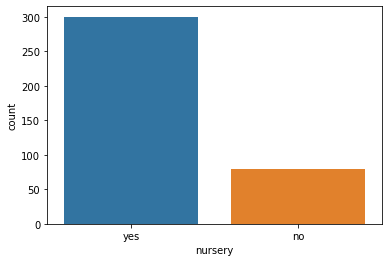

In [35]:
display(students['nursery'].value_counts(dropna=False))
sns.countplot(data=students, x='nursery');

In [36]:
students.groupby('nursery')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
nursery,,,,,,,,
no,77.0,50.000000,22.492689,0.0,40.0,55.0,65.0,90.0
yes,297.0,52.962963,22.745848,0.0,40.0,55.0,70.0,100.0


**Итого:** в столбце **2** уникальных значений (yes, no). Пропущено **16** значений. В данном случае можно использовать в качестве заполнителя наиболее часто встречающееся значение. Посещенеие детского сада практически не влияет на итоговые баллы по математике.

In [37]:
sub = students['nursery'].describe()['top']
students['nursery'] = students['nursery'].fillna(sub)

## studytime, granular
Номинативный признак.

-6.0     194
-3.0     103
-9.0      64
-12.0     27
 NaN       7
Name: studytime, granular, dtype: int64

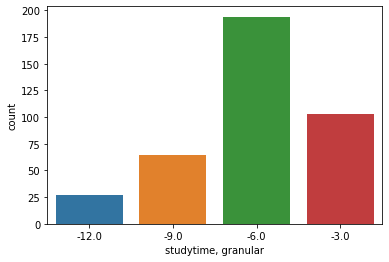

In [38]:
display(students['studytime, granular'].value_counts(dropna=False))
sns.countplot(data=students, x='studytime, granular');

В столбце **4** уникальных значений (-3, -6, -9, -12). Пропущено **7** значений. Название столбца, число уникальных значений и их количество, а также количество пропусков идентичны столбцу studytime. Найдем коэффициент корреляции этих двух признаков.    

In [39]:
students[['studytime', 'studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


**Итого:** Видно, что коэффициент корреляции равен -1, следвательно данные признаки полностью противоположны.
Данный столбец можно исключить из дальнейшего рассмотрения.

In [40]:
students.drop('studytime, granular', axis=1, inplace=True)

## higher
Хочет получить высшее образование (yes или no). Номинативный признак.

yes    356
NaN     20
no      19
Name: higher, dtype: int64

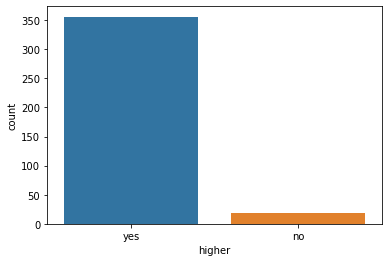

In [41]:
display(students['higher'].value_counts(dropna=False))
sns.countplot(data=students, x='higher');

In [42]:
students.groupby('higher')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
higher,,,,,,,,
no,19.0,33.684211,24.767929,0.0,0.0,40.0,50.0,65.0
yes,350.0,53.100000,22.676339,0.0,45.0,55.0,70.0,100.0


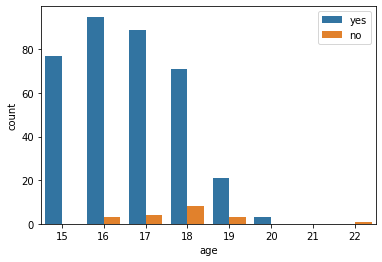

In [43]:
ax = sns.countplot(data=students, x='age', hue='higher')
ax.legend(loc='upper right');

**Итого:** в столбце **2** уникальных значений (yes, no). Пропущено **20** значений. В данном случае можно использовать в качестве заполнителя наиболее часто встречающееся значение. Количество учеников, которые не хотят получить высшее образование достаточно мало и их пик приходится на возраст 18 лет.

In [44]:
sub = students['higher'].describe()['top']
students['higher'] = students['higher'].fillna(sub)

## internet
Наличие интернета дома (yes или no). Номинативный признак.

yes    305
no      56
NaN     34
Name: internet, dtype: int64

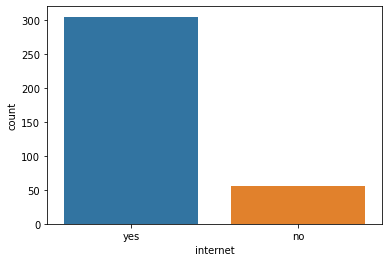

In [45]:
display(students['internet'].value_counts(dropna=False))
sns.countplot(data=students, x='internet');

In [46]:
students.groupby('internet')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
internet,,,,,,,,
no,55.0,49.090909,22.028830,0.0,42.5,50.0,60.0,90.0
yes,300.0,53.116667,22.691837,0.0,40.0,55.0,70.0,100.0


**Итого:** в столбце **2** уникальных значений (yes, no). Пропущено **34** значений. В данном случае можно использовать в качестве заполнителя наиболее часто встречающееся значение.

In [47]:
sub = students['internet'].describe()['top']
students['internet'] = students['internet'].fillna(sub)

## romantic
В романтических отношениях (yes или no). Номинативный признак.

no     240
yes    124
NaN     31
Name: romantic, dtype: int64

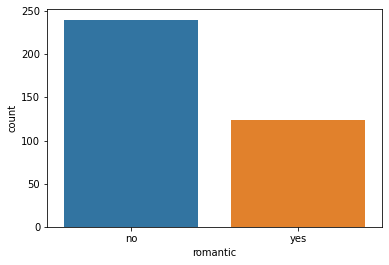

In [48]:
display(students['romantic'].value_counts(dropna=False))
sns.countplot(data=students, x='romantic');

In [49]:
students.groupby('romantic')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
romantic,,,,,,,,
no,235.0,54.574468,22.126042,0.0,45.0,55.0,70.0,100.0
yes,123.0,47.682927,24.564174,0.0,40.0,55.0,65.0,90.0


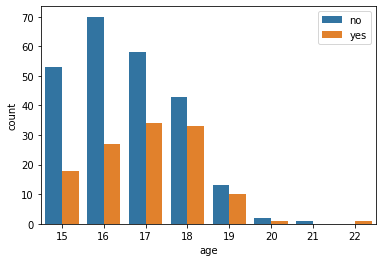

In [50]:
ax = sns.countplot(data=students, x='age', hue='romantic')
ax.legend(loc='upper right');

**Итого:** в столбце **2** уникальных значения (yes, no). Пропущено **31** значение. Заполнить пропуски в данный момент не представляется возможным.

## famrel
Семейные отношения (от 1 - очень плохо до 5 - очень хорошо). Номинативный признак.

 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

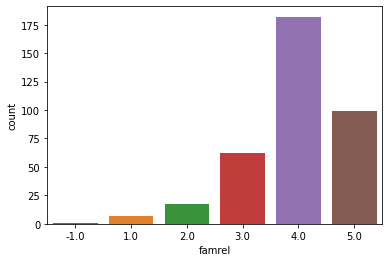

In [51]:
display(students['famrel'].value_counts(dropna=False))
sns.countplot(data=students, x='famrel');

**Итого:** в столбце **5** уникальных значений (1, 2, 3, 4, 5). Пропущено **27** значений. Заполнить пропуски в данный момент не представляется возможным.  Здесь явно прослеживается выброс равный **-1**. По скольку в данном столбце всего 5 категорий, то вероятно выброс получился в результате опечатки и реальное значение относится к категории **1**.

In [52]:
index = students[students['famrel'] == -1].index
students.loc[index, ['famrel']] = 1.0

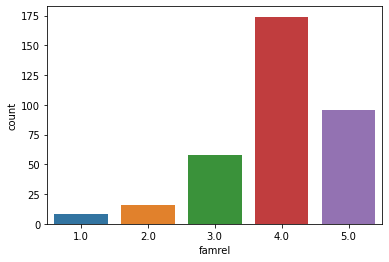

In [73]:
sns.countplot(data=students, x='famrel');

## freetime
Свободное время после школы (от 1 - очень мало до 5 - очень мого). Номинативный признак.

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

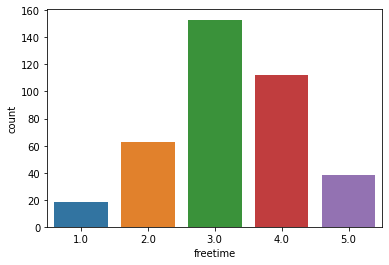

In [53]:
display(students['freetime'].value_counts(dropna=False))
sns.countplot(data=students, x='freetime');

**Итого:** в столбце **5** уникальных значений (1, 2, 3, 4, 5). Пропущено **11** значений. Заполнить пропуски в данный момент не представляется возможным.

 ## goout
Проведение времени с друзьями (от 1 - очень мало до 5 - очень много). Номинативный признак.

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64

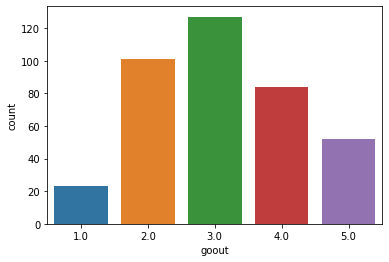

In [54]:
display(students['goout'].value_counts(dropna=False))
sns.countplot(data=students, x='goout');

**Итого:** в столбце **5** уникальных значений (1, 2, 3, 4, 5). Пропущено **8** значений. Заполнить пропуски в данный момент не представляется возможным.

## health
Текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо). Номинативный признак.

5.0    35.0
3.0    23.0
4.0    16.0
1.0    12.0
2.0    11.0
NaN     4.0
Name: health, dtype: float64

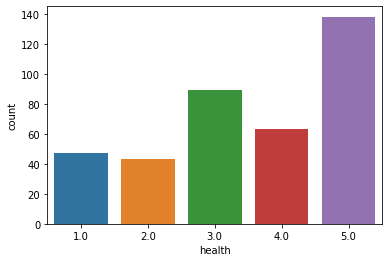

In [55]:
display(round(students['health'].value_counts(
    dropna=False, normalize=True)*100))
sns.countplot(data=students, x='health');

In [56]:
students.groupby('health')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
health,,,,,,,,
1.0,47.0,59.361702,21.759981,0.0,50.0,65.0,75.0,95.0
2.0,42.0,52.619048,27.235157,0.0,45.0,55.0,70.0,100.0
3.0,88.0,50.625000,20.578033,0.0,40.0,52.5,60.0,95.0
4.0,60.0,50.833333,24.549615,0.0,40.0,50.0,70.0,95.0
5.0,137.0,52.189781,22.547836,0.0,40.0,55.0,65.0,90.0


**Итого:** в столбце **5** уникальных значений (1, 2, 3, 4, 5). Пропущено **15** значений. Заполнить пропуски в данный момент не представляется возможным. **23%** учеников имеют здоровье ниже среднего. Ученики с очень плохим здоровьем в среднем имеют более высокие баллы по математике.

## absences
Количество пропущенных занятий. Количественный признак.

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
NaN       12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

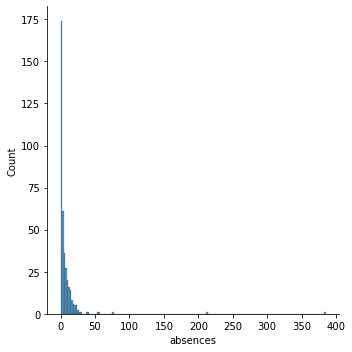

In [57]:
display(students['absences'].value_counts(dropna=False))
sns.displot(data=students, x='absences');

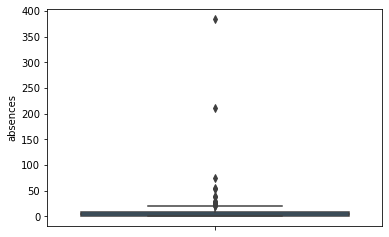

In [58]:
sns.boxplot(data=students, y='absences');

Пропущено **12** значений. Есть выбросы, связанные с учениками, которые пропустили много занятий. 
Для того чтобы отобрать экстремально низкие и экстремально высокие оценки проведем IQR анализ.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


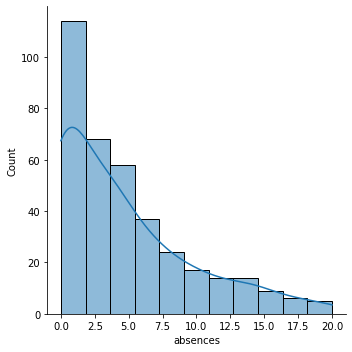

In [59]:
IQR = students['absences'].quantile(0.75) - students['absences'].quantile(0.25)
perc25 = students['absences'].quantile(0.25)
perc75 = students['absences'].quantile(0.75)
sns.displot(data=students.loc[students['absences'].between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)], x='absences', kde=True);
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Видно, что подавляющее количество учеников не пропускали занятия, поэтому в данном случае можно использовать в качестве заполнителя наиболее часто встречающееся значение, так как это практически не повлияет на распределение признака.

In [60]:
sub = students['absences'].describe()['min']
students['absences'] = students['absences'].fillna(sub)

Отфильтруем данные:

In [61]:
students = students.loc[students['absences'].between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

## score
Баллы по госэкзамену по математике. Количественный признак.

50.0     54
55.0     42
0.0      37
75.0     33
60.0     31
65.0     30
40.0     28
70.0     27
45.0     23
80.0     16
30.0     14
90.0     10
35.0      9
25.0      7
NaN       6
85.0      5
95.0      5
100.0     1
Name: score, dtype: int64

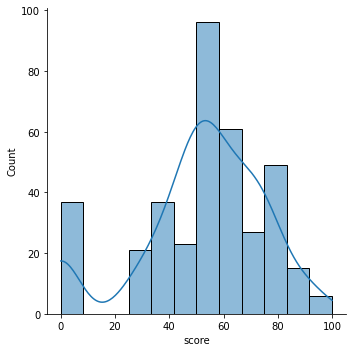

In [62]:
display(students['score'].value_counts(dropna=False))
sns.displot(data=students, x='score', kde=True);

Пропущено **6** значений. Их можно заполнить медианой. Есть **37** оценок с нулевым значением. Это может быть как ошибка при заполнении данных, так и реальные оценки за экзамен по математике. 

In [63]:
med = students['score'].median()
students['score'] = students['score'].fillna(med)

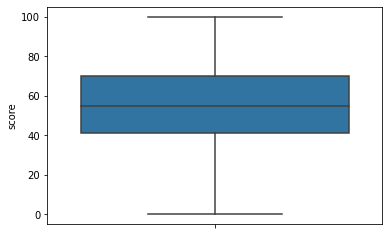

In [64]:
sns.boxplot(data=students, y='score');

**Итого:** распределение итоговых оценок по математике находится в пределах от 0 до 100 баллов. Выбросов нет. **6** пропущенных значений были заменены на медиану. Выбросов по данному признаку не наблюдается.

# Корреляционный анализ

Посмотрим как числовые признаки коррелируют с итоговой оценкой по математике. 

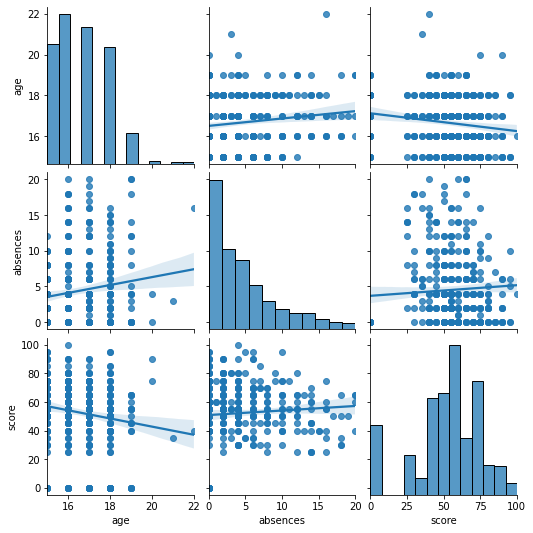

In [65]:
sns.pairplot(students[['age', 'absences', 'score']], kind='reg');

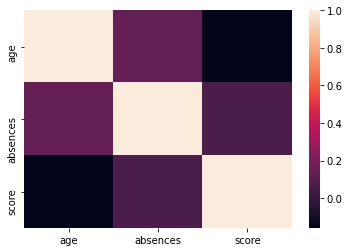

In [66]:
sns.heatmap(students[['age', 'absences', 'score']].corr());

In [67]:
students[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.141351,-0.157974
absences,0.141351,1.000000,0.068826
score,-0.157974,0.068826,1.000000


**Итого:** остаются две переменные слабоскоррелированные с оценками по математике: age и absences. Интересно, что отрицательная корреляция показывает, что с увеличением возраста снижается оценка по математике. Это может быть следсвием недостатка данных по возрастным группам, или что с возрастом ученики меньше мотивированы. 

# Анализ номинативных переменных

Номинативные переменные, которые будем брать в рассмотрение: school, sex, address, famsize, Pstatus,  Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, health

In [68]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

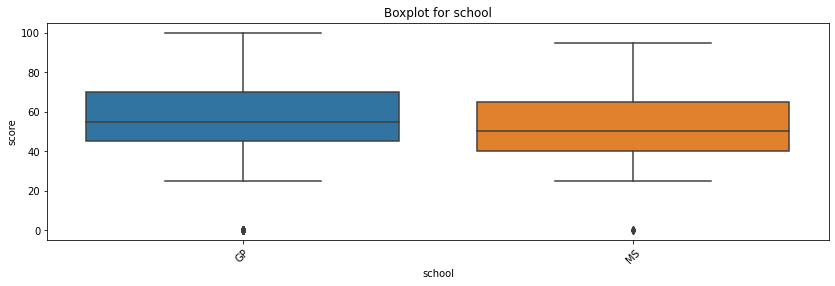

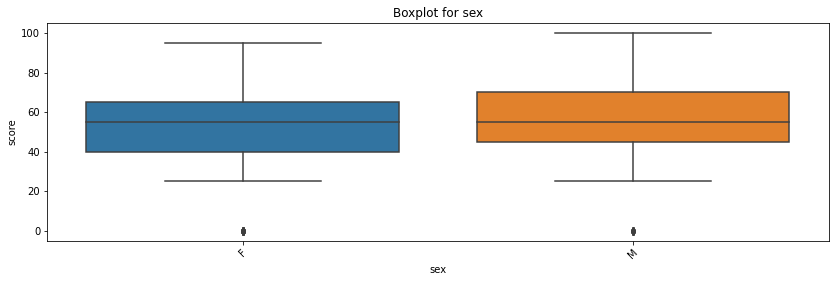

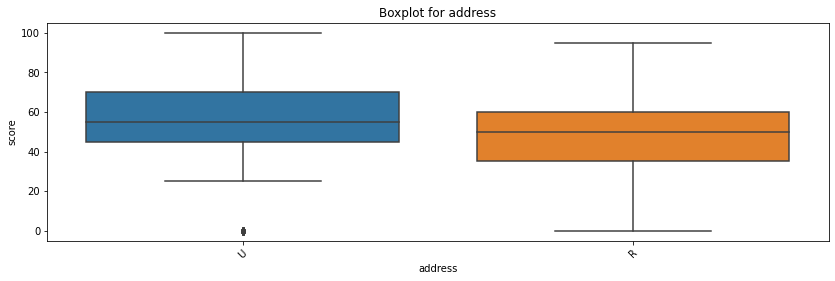

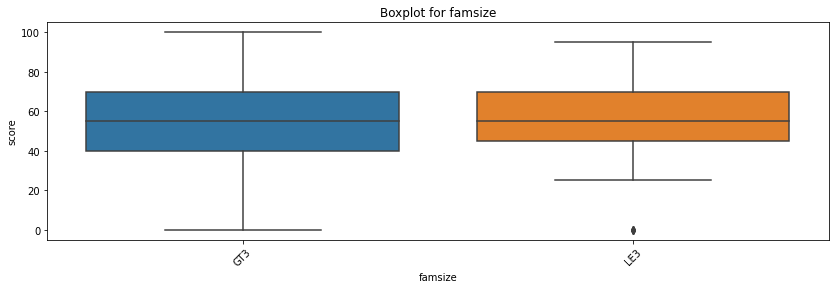

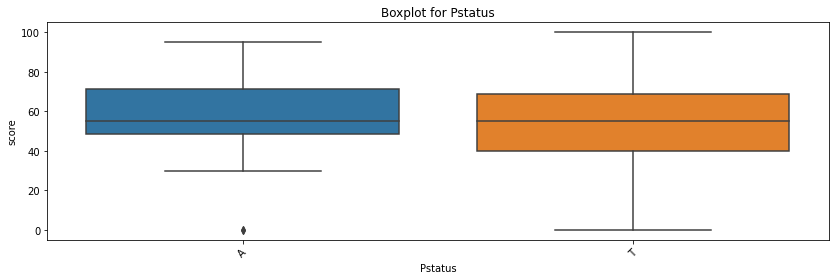

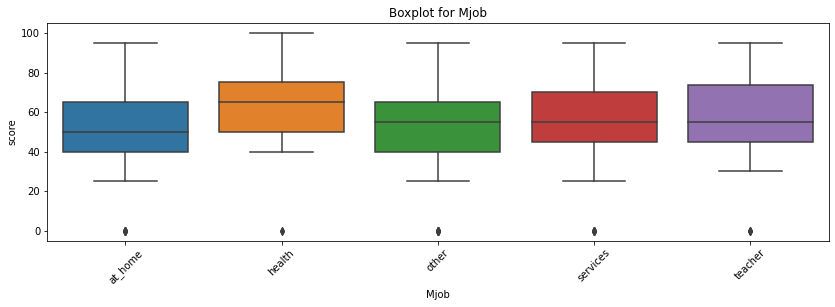

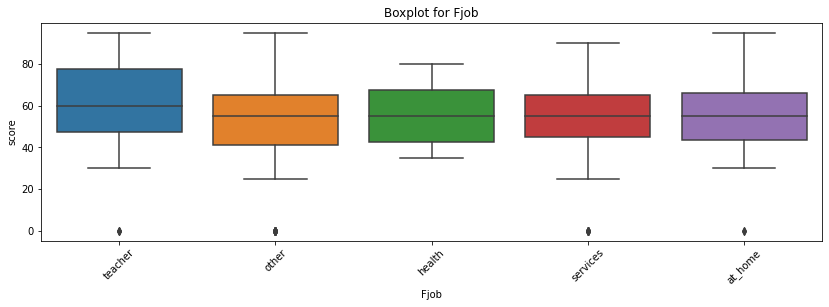

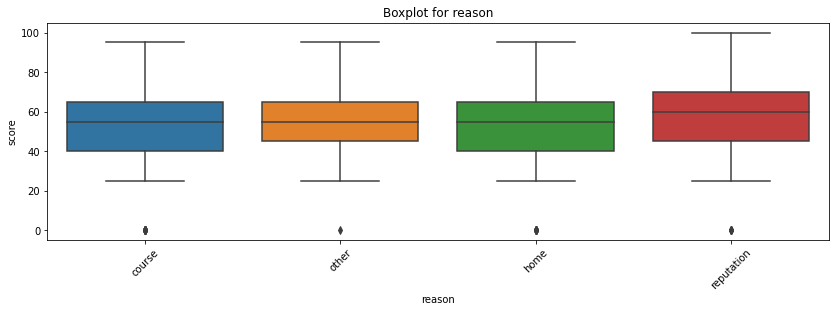

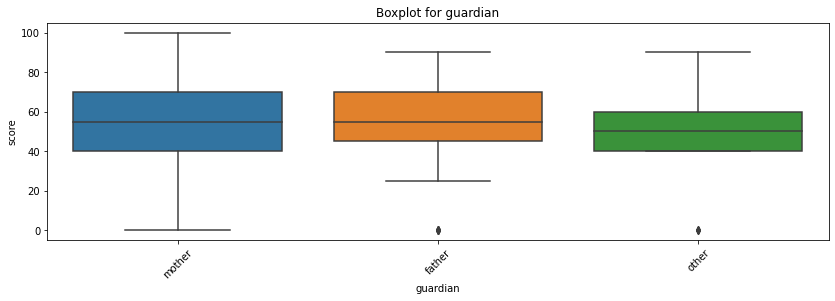

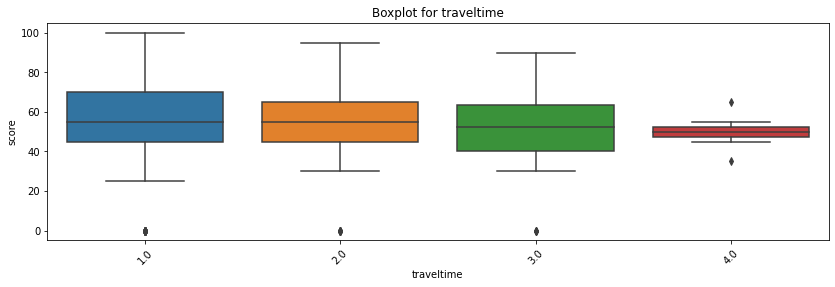

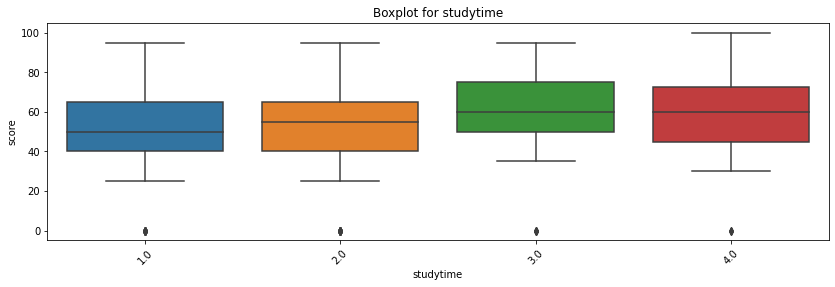

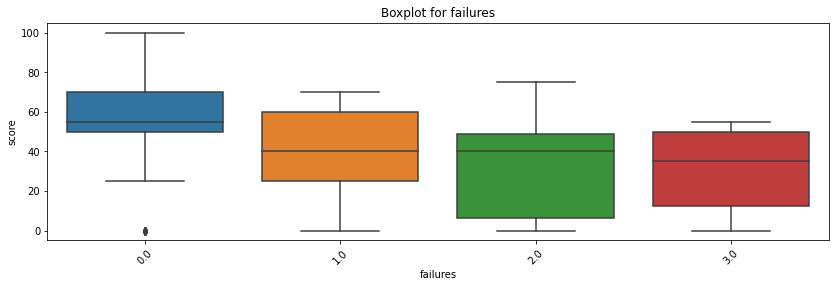

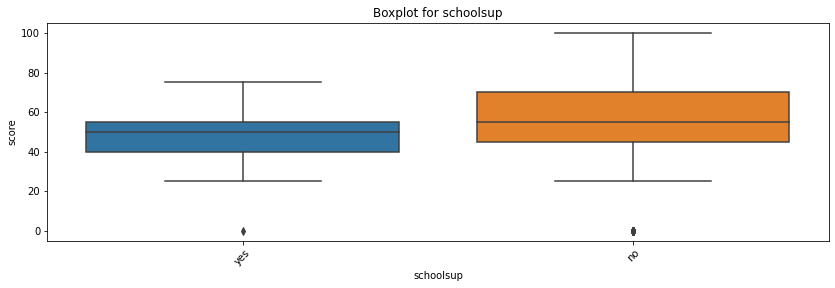

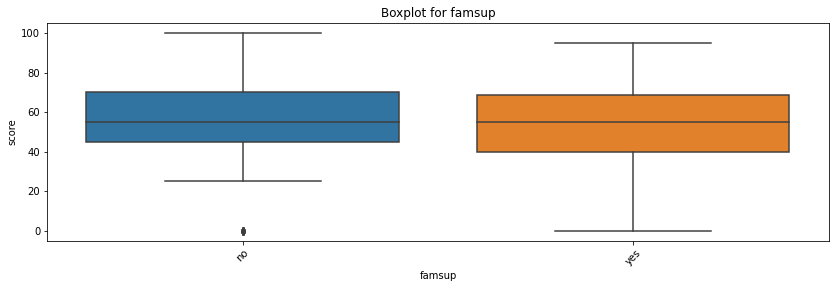

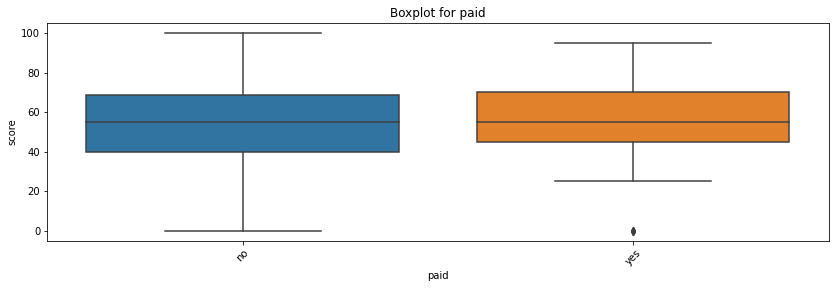

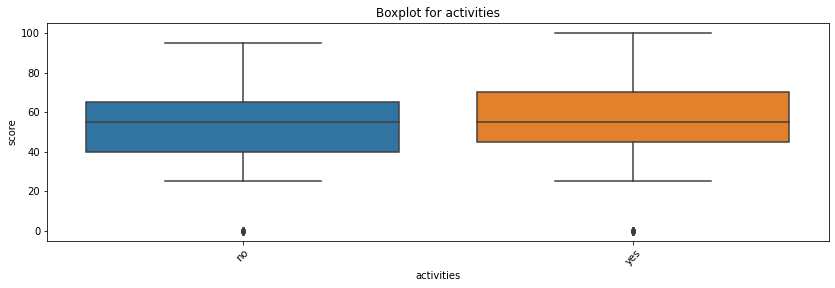

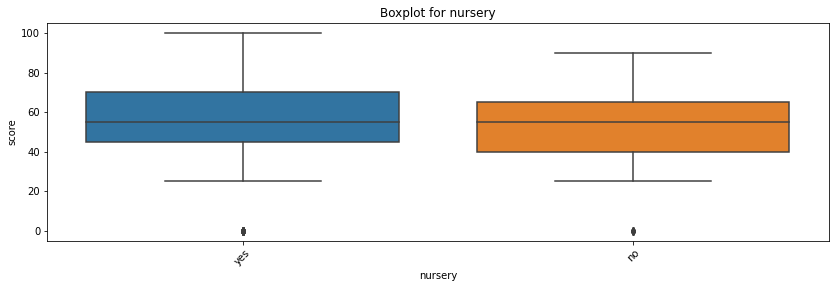

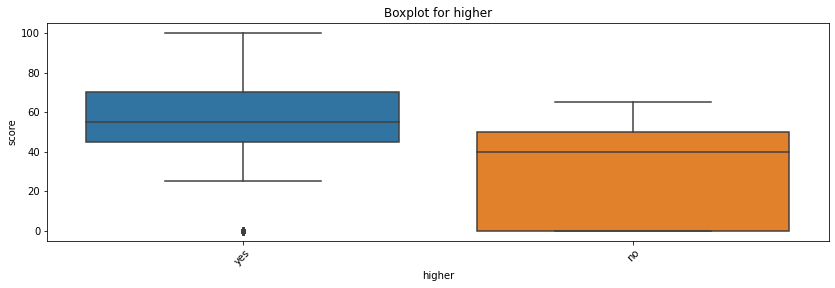

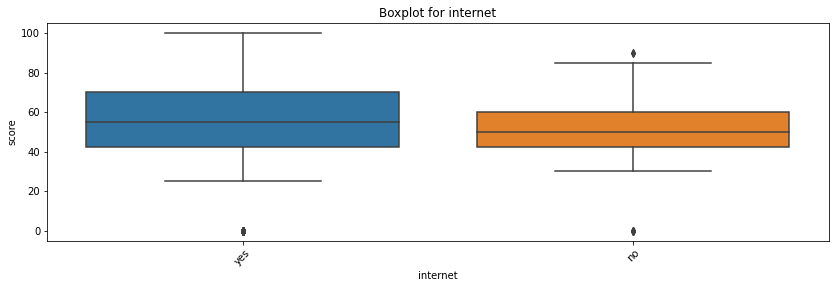

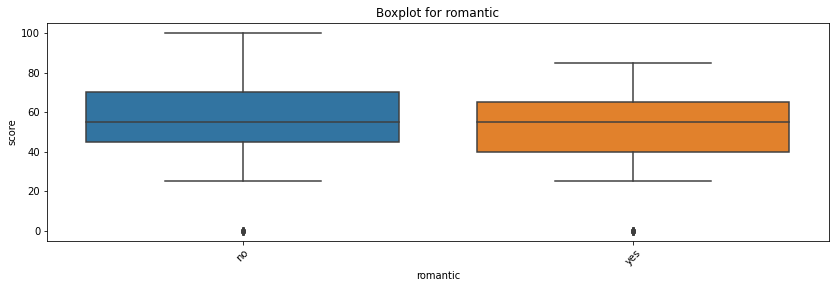

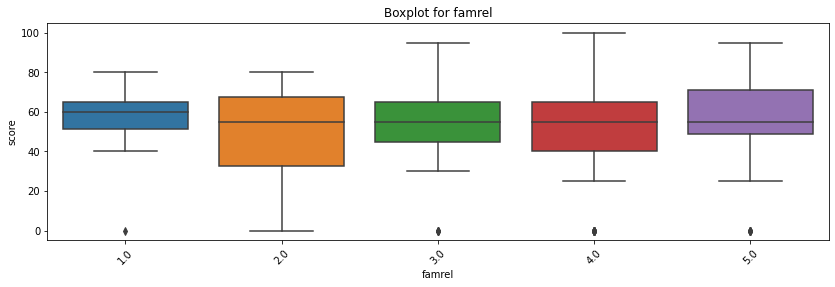

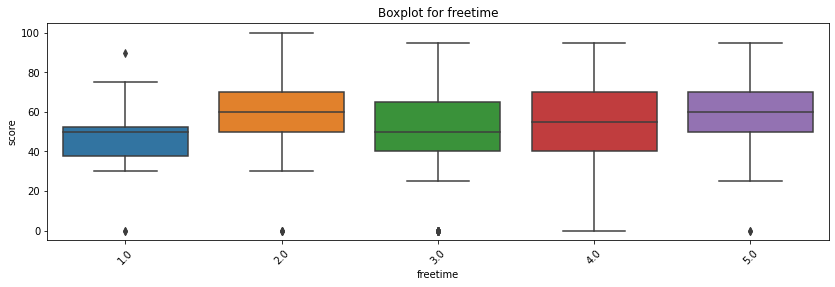

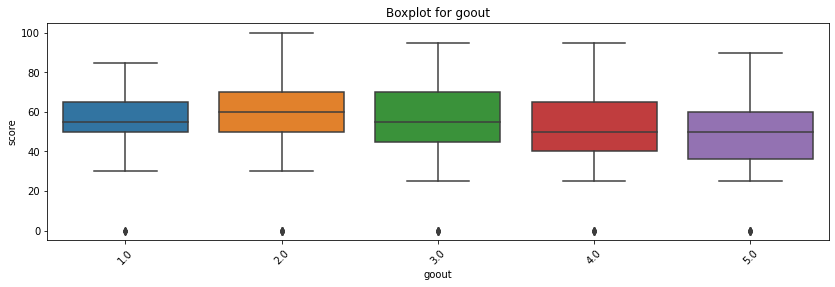

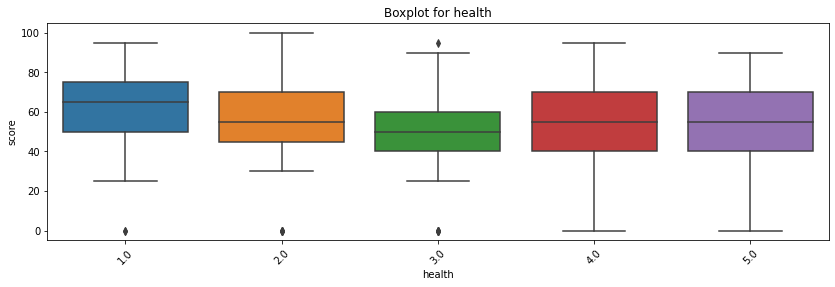

In [69]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'traveltime', 'studytime', 'failures',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по математике по различным параметрам неразличимы:

In [70]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [71]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'traveltime', 'studytime', 'failures',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются несколько параметров: sex,  address, Mjob, failures, paid, higher и romantic. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку по математике, это: sex,  address, Mjob, failures, paid, higher, romantic, age, absences.

In [72]:
students_model = students.loc[:, ['sex', 'age', 'address',
                                  'Mjob', 'failures', 'paid', 'higher', 'romantic', 'absences']]
students_model

,sex,age,address,Mjob,failures,paid,higher,romantic,absences
0,F,18,U,at_home,0.0,no,yes,no,6.0
1,F,17,U,at_home,0.0,no,yes,no,4.0
2,F,15,U,at_home,3.0,NaN,yes,NaN,10.0
3,F,15,U,health,0.0,yes,yes,yes,2.0
4,F,16,U,other,0.0,yes,yes,no,4.0
...,...,...,...,...,...,...,...,...,...
389,F,18,U,other,1.0,no,yes,no,0.0
391,M,17,U,services,0.0,no,yes,no,3.0
392,M,21,R,other,3.0,no,yes,no,3.0
393,M,18,R,services,0.0,no,yes,no,0.0


# Выводы
В результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике могут быть сделаны следующие выводы:

1. В данных достаточно мало пустых значений. Максимум пропущеных значений составляет 11% в столбце Pstatus. Пропуски остальных столбцов не превышают 10%. В целевом признаке было пропущено 2% значений.
2. Выбросы найдены в столбцах с данными об образовании отца, семейных отношениях и количестве пропущенных занятий. Первые два выброса характеризуются опечатками при формировании данных, а третий - человеческим фактором. Выше сказанное позволяет сделать вывод о том, что данные достаточно чистые.
3. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, address, Mjob, failures, paid, higher, romantic, age, absences.
4. Итоговый набор данных составляет 378 строк и 9 столбцов.